4. Assignment on Clustering Techniques
Download the following customer dataset from below link:
Data Set: https://www.kaggle.com/shwetabh123/mall-customers
This dataset gives the data of Income and money spent by the customers visiting a Shopping
Mall. The data set contains Customer ID, Gender, Age, Annual Income, Spending Score.
Therefore, as a mall owner you need to find the group of people who are the profitable
customers for the mall owner. Apply at least two clustering algorithms (based on Spending
Score) to find the group of customers.
A. Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if
necessary.
B. Perform data-preparation( Train-Test Split)
C. Apply Machine Learning Algorithm
D. Evaluate Model.
E. Apply Cross-Validation and Evaluate Model

In [3]:
hin= "\u0930\u094B\u0936\u0928\u0940 \u0917\u094C\u0921\u093C"
print("Developed by",hin)

Developed by रोशनी गौड़


In [69]:
!pip install mlxtend

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
file_path = "Market_Basket_Optimisation.csv"
data = pd.read_csv(file_path)

In [9]:
# Data Preprocessing: Replace NaN values and convert to list of transactions
data.fillna('', inplace=True)
transactions = []
for i in range(0, len(data)):
    transaction = [str(item) for item in data.iloc[i] if item != '']
    transactions.append(transaction)

In [13]:
# Convert transactions into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# to get association rules with given support and confidence
def get_rules(min_support, min_confidence):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Initialize list to store results
results = []

# Try different values for support and confidence
support_values = [0.01, 0.02, 0.03, 0.04]
confidence_values = [0.2, 0.3, 0.4, 0.5]

for support in support_values:
    for confidence in confidence_values:
        rules = get_rules(support, confidence)
        results.append({
            'support': support,
            'confidence': confidence,
            'num_rules': len(rules)
        })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# You can then select optimal combination based on number of rules generated.

    support  confidence  num_rules
0      0.01         0.2        162
1      0.01         0.3         63
2      0.01         0.4         17
3      0.01         0.5          2
4      0.02         0.2         56
5      0.02         0.3         20
6      0.02         0.4          3
7      0.02         0.5          0
8      0.03         0.2         27
9      0.03         0.3          7
10     0.03         0.4          1
11     0.03         0.5          0
12     0.04         0.2          9
13     0.04         0.3          4
14     0.04         0.4          1
15     0.04         0.5          0


In [19]:
# Train Apriori algorithm on dataset with a minimum support of 0.02
frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)

In [21]:
# Generate association rules with a minimum confidence of 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

In [25]:
# Determine maximum length of itemsets
max_length = frequent_itemsets['itemsets'].apply(len).max()

# Filter frequent itemsets that have maximum length
last_table = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) == max_length]

# Rounding support values to 3 decimal places
last_table = last_table.round(3)

# Reset index so the serial numbers start from 0
last_table = last_table.reset_index(drop=True)

# Display the last table of frequent itemsets
print(last_table)


    support                            itemsets
0     0.029                     (burgers, eggs)
1     0.022             (french fries, burgers)
2     0.024            (burgers, mineral water)
3     0.021                (burgers, spaghetti)
4     0.027               (cake, mineral water)
5     0.023            (chicken, mineral water)
6     0.033                   (chocolate, eggs)
7     0.034           (chocolate, french fries)
8     0.023      (chocolate, frozen vegetables)
9     0.023              (chocolate, green tea)
10    0.023            (chocolate, ground beef)
11    0.032                   (chocolate, milk)
12    0.053          (chocolate, mineral water)
13    0.039              (chocolate, spaghetti)
14    0.020        (cooking oil, mineral water)
15    0.036                (french fries, eggs)
16    0.022           (frozen vegetables, eggs)
17    0.025                   (green tea, eggs)
18    0.020                 (ground beef, eggs)
19    0.031                        (milk

In [29]:
# Display generated rules with values rounded to 2 decimal points
rounded_rules = rules.round(2)  # Round all numeric columns to 2 decimal points
print(rounded_rules.head(20).to_string(index=True))

            antecedents      consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric
0             (burgers)           (eggs)                0.09                0.18     0.03        0.33  1.84      0.01        1.22           0.50
1                (cake)  (mineral water)                0.08                0.24     0.03        0.34  1.42      0.01        1.15           0.32
2             (chicken)  (mineral water)                0.06                0.24     0.02        0.38  1.59      0.01        1.23           0.40
3           (chocolate)  (mineral water)                0.16                0.24     0.05        0.32  1.35      0.01        1.12           0.31
4         (cooking oil)  (mineral water)                0.05                0.24     0.02        0.39  1.65      0.01        1.26           0.42
5     (frozen smoothie)  (mineral water)                0.06                0.24     0.02        0.32  1.34      0.01        1.12 

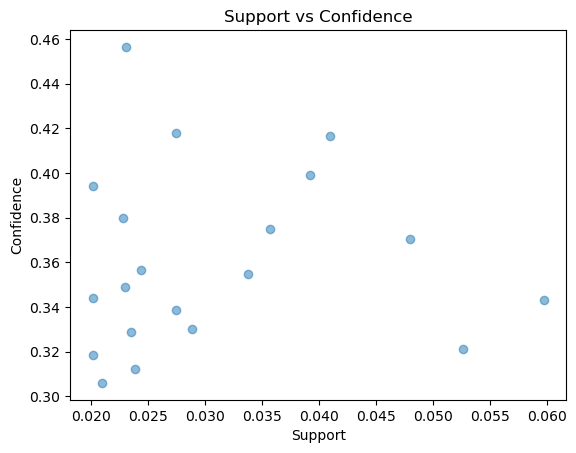

In [31]:
# Plotting support vs confidence for rules
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

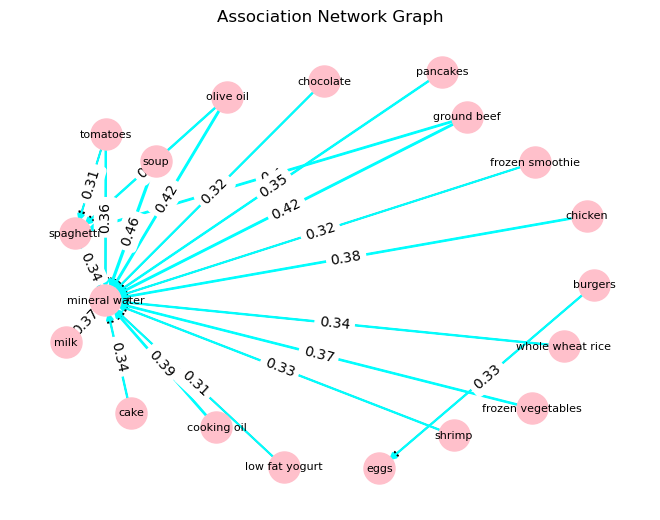

In [33]:
# Initialize a directed graph
G = nx.DiGraph()

# Add edges to graph based on association rules
for _, rule in rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    G.add_edge(antecedents, consequents, weight=rule['confidence'])

# layout for graph
pos = nx.spring_layout(G, k=500)  # 'k' controls distance between nodes

# Draw nodes with labels
nx.draw(G, pos, with_labels=True, node_size=500, node_color='pink', font_size=8, arrows=True)

# Draw edges with varying thickness based on confidence (rule strength
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[rule['weight']*5 for (_, _, rule) in edges], edge_color='cyan')

# Add labels to edges (showing confidence of rule
edge_labels = {(ante, cons): f"{round(data['weight'], 2)}" for (ante, cons, data) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Network Graph")
plt.show()